<a href="https://colab.research.google.com/github/Dr-Mohamed-Elkholy/Machine-Learning-Projects/blob/main/convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks
You should build an end-to-end machine learning pipeline using a convolutional neural network model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [convolutional neural network](https://keras.io/examples/vision/mnist_convnet/) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Load the MNIST Dataset

In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


## Preprocess the Data and Split into Training and Test Sets

In [27]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


##  Build a Convolutional Neural Network

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


## Compile and train the Model

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split= 0.2, callbacks=[early_stopping])


Epoch 1/5
750/750 [==============================] - 41s 53ms/step - loss: 0.2070 - accuracy: 0.9343 - val_loss: 0.0636 - val_accuracy: 0.9812
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0535 - val_accuracy: 0.9851
Epoch 3/5
750/750 [==============================] - 37s 50ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0420 - val_accuracy: 0.9868
Epoch 4/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0489 - val_accuracy: 0.9866
Epoch 5/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0329 - val_accuracy: 0.9900


## Evaluate the Model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 576)             

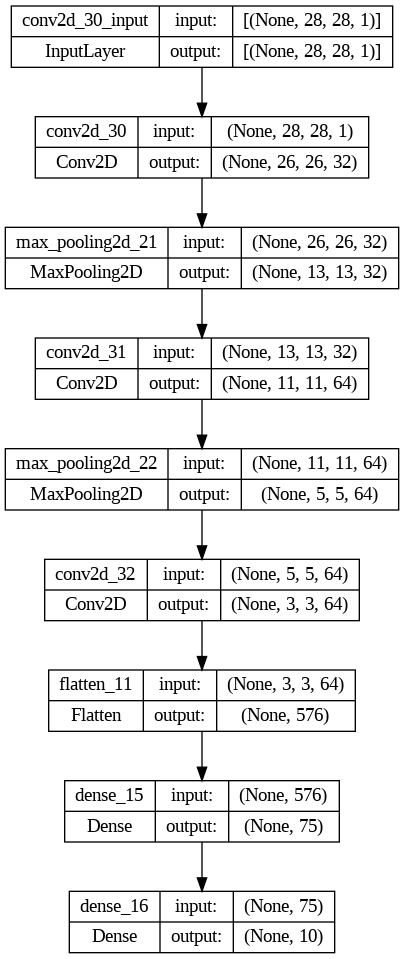

In [31]:
# Print the summary of the model
model.summary()

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 4s 13ms/step - loss: 0.0258 - accuracy: 0.9917
Test accuracy: 0.9916999936103821



Deafult:
- scaling
- One conv layer with 32 filter and size 3*3
- Flatten
- One dense layer with relu activation function
val_accuracy: 0.0995


Hyperparameter | ACC Before | Modification| ACC after
======================================================
- Adding anoth
 CNN
with 64 filter + max pooling  val_accuracy: 0.0995 NO improvement at all.

- Adding one another CNN with 64 filters val accuracy 0.0996 Again no improvment.
- in the dense layer, chaning the activation fucntion from 'relu' to 'softmax': the model is dicharged from the intensive care unit and val_accuracy is 0.9870
- Adding one more dense layer
